In [1]:
import numpy as np
import scipy.fftpack as fftpack
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

import cv2

In [2]:
age1= sio.loadmat('./age_group/age_big.mat')
path1=sio.loadmat('./age_group/path_big.mat')
data_age= age1['data_age']
data_path= path1['data_path']

In [3]:
images=[]
age=[]
path=[]
r=0
# print(data_path[0,0])
[h,w]= data_path.shape
print(w)
for i in range(1000):
    str_1= ''.join(data_path[0,i])
    str_1='./imdb_crop/'+str_1
    str_1.replace(" \ "," / ")
    
    temp_age= data_age[0,i]
    try:
        data=plt.imread(str_1)
        # plt.imshow(data)
        # age.append(temp_age)
        # path.append(str_1)
        
    except:
        print(str_1)
        print(i)
        continue
    img1= cv2.resize(data,(256,256))
    try:
        img= img1.reshape(256*256*3)
    except:
        continue
    images.append(img1)
    age.append(temp_age)
print("finished")
print(len(images))

459463


finished
608


(256, 256, 3)
(256, 256, 3)
['02/nm0000002_rm4291934720_1924-9-16_2004.jpg']


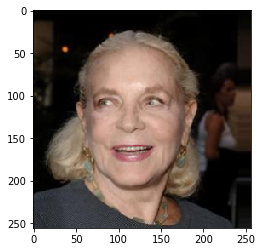

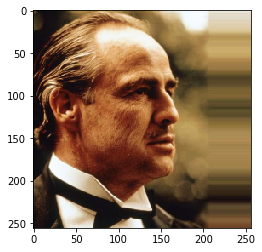

In [4]:
# plt.imshow(images[62300])
print(images[62].shape)
print(images[58].shape)
plt.imshow(images[38].reshape(256,256,3))
print(data_path[0,38])
plt.figure()
plt.imshow(images[100].reshape(256,256,3))

In [5]:
vec_image= np.asanyarray(images)
vec_image= vec_image
print(vec_image.shape)
train_image=vec_image[0:600,:]
test_image=vec_image[600:,:]

(608, 196608)


In [7]:
pca400= PCA(n_components=400)
out= pca400.fit_transform(train_image)
# test_out= pca400.transform(test_image)
print(out.shape)
# print(test_out.shape)

In [10]:
test_out= pca400.transform(test_image)
print(test_out.shape)

(376, 400)


In [14]:
print(len(age))
age_train=age[:1200]
age_test= age[1200:]

1576


In [15]:
neigh = KNeighborsClassifier(n_neighbors=3)
x= out
y= np.asanyarray(age_train)
neigh.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

(array([ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
         1.,  0.,  1.,  2.,  2.,  0.,  2.,  0.,  1.,  2.,  2.,  4.,  4.,
         1.,  2.,  2.,  1.,  4.,  3.,  2.,  2.,  2.,  4.,  3.,  8.,  3.,
         1.,  3.,  3.,  5.,  2.,  2.,  2.,  1.,  3.,  5.,  1., 12.,  5.,
         4.,  3.,  6.,  4.,  9., 10.,  8.,  8., 10., 13., 27.,  9., 19.,
        13., 13.,  6., 12., 16.,  5., 13.,  7.,  5.,  9.,  9.,  1.,  5.,
         4.,  2.,  1.,  1.,  2.,  2.,  1.,  0.,  4.,  1.,  1.,  0.,  0.,
         0.,  0.,  2.,  0.,  1.,  0.,  0.,  1.,  2.]),
 array([-72.  , -70.92, -69.84, -68.76, -67.68, -66.6 , -65.52, -64.44,
        -63.36, -62.28, -61.2 , -60.12, -59.04, -57.96, -56.88, -55.8 ,
        -54.72, -53.64, -52.56, -51.48, -50.4 , -49.32, -48.24, -47.16,
        -46.08, -45.  , -43.92, -42.84, -41.76, -40.68, -39.6 , -38.52,
        -37.44, -36.36, -35.28, -34.2 , -33.12, -32.04, -30.96, -29.88,
        -28.8 , -27.72, -26.64, -25.56, -24.48, -23.4 , -22.32, -21.24,
  

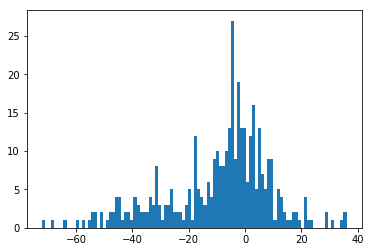

In [16]:
z=neigh.predict(test_out)
y_test= np.asanyarray(age_test)
count=0
diff= z-y_test
plt.hist(diff,bins=100)

In [5]:
input_img= np.array(images)
print(input_img.shape)
#input_img=input_img.reshape(-1,256,256)
fft_image= fftpack.dct(images)
print(fft_image.shape)

(608, 256, 256, 3)


(608, 256, 256, 3)


In [2]:
train_image=fft_image[0:500,:]
test_image=fft_image[500:,:]
train_image= train_image.reshape(-1,256*256*3)
test_image=test_image.reshape(-1,256*256*3)
print(train_image.shape)

NameError: name 'fft_image' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 84.          -1.73205081  -9.        ]
  [ 78.          -1.73205081  -9.        ]
  [ 80.           1.73205081  -5.        ]
  ...
  [ 56.          -5.19615242   1.        ]
  [ 56.          -5.19615242   1.        ]
  [ 54.           0.           0.        ]]

 [[ 80.           1.73205081  -5.        ]
  [ 86.           1.73205081  -5.        ]
  [ 86.           1.73205081  -5.        ]
  ...
  [ 56.          -5.19615242   1.        ]
  [ 56.          -5.19615242   1.        ]
  [ 54.           0.           0.        ]]

 [[ 80.           1.73205081  -5.        ]
  [ 86.           1.73205081  -5.        ]
  [ 98.           1.73205081  -5.        ]
  ...
  [ 56.          -5.19615242   1.        ]
  [ 56.          -5.19615242   1.        ]
  [ 54.           0.           0.        ]]

 ...

 [[198.          83.13843876 -42.        ]
  [202.          79.67433715 -40.        ]
  [232.          72.74613392 -34.        ]
  ...
  [412.         173.20508076  32.        ]
  [334.         17

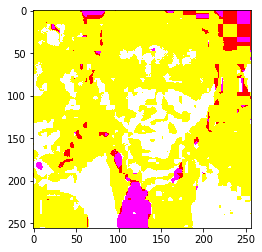

In [31]:
plt.imshow(train_image[0])
print(train_image[0])

In [19]:
pca400= PCA(n_components=400)
out= pca400.fit_transform(train_image)
# test_out= pca400.transform(test_image)
print(out.shape)

ValueError: Complex data not supported
[[ 2.92880000e+04    +0.j          9.26000000e+02 -1991.8584287j
   9.26000000e+02 +1991.8584287j  ... -2.03339515e+04-15894.81191949j
   7.93438504e+02 -3514.41633323j  4.37984649e+03 -1660.45202489j]
 [ 1.17896000e+05    +0.j          8.31050000e+03 -8209.05480247j
   8.31050000e+03 +8209.05480247j ...  7.10909518e+03+31398.27380428j
  -3.24130889e+01  -516.29715359j -2.76649880e+02  -515.43585921j]
 [ 9.40800000e+04    +0.j          3.03600000e+03  +116.04740411j
   3.03600000e+03  -116.04740411j ... -1.38028380e+04 -9341.50767442j
   1.49643475e+03 -2207.26014649j  1.94590487e+03   -94.76873213j]
 ...
 [ 1.03856000e+05    +0.j          5.51450000e+03-12585.9471932j
   5.51450000e+03+12585.9471932j  ... -3.51830281e+03 -6168.57282703j
  -4.33108000e+02 +1770.55792441j  5.31919945e+02  +495.59671204j]
 [ 1.33809000e+05    +0.j         -6.38250000e+03 +4550.96349689j
  -6.38250000e+03 -4550.96349689j ... -3.09962746e+03-24389.82706954j
   9.23835242e+02 -1435.95908908j  1.09593560e+03  -973.51227198j]
 [ 9.63520000e+04    +0.j         -1.20230000e+04   +58.88972746j
  -1.20230000e+04   -58.88972746j ...  8.30489447e+03 -5947.91434583j
  -1.90413326e+03  -399.44951319j -6.81437725e+02  -819.19755834j]]
